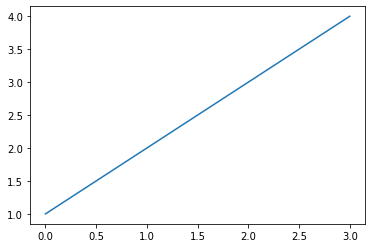

In [1]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4])

In [2]:
import numpy as np
from torch import nn
import torch
from torch.optim import SGD, Adam
from torch.utils.data import DataLoader,TensorDataset

In [3]:
data = np.array([[0.,0.],[1.,0.],[0.,1.],[1.,1.]])

In [4]:
labels = np.array([1.,0.,0.,1.])

In [5]:
x = [d[0] for d in data]
y = [d[1] for d in data]

In [6]:
data[:,0]

array([0., 1., 0., 1.])

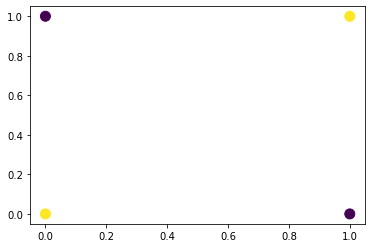

In [7]:
plt.scatter(x,y,s=100,c=labels);

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
lr = LogisticRegression()

In [10]:
lr.fit(data,labels)

LogisticRegression()

In [11]:
labels.reshape(-1,1)

array([[1.],
       [0.],
       [0.],
       [1.]])

In [12]:
def plot_decision_boundary(data,labels,clf):
    plot_step = 0.02
    x_min, x_max = data[:,0].min() -1, data[:,0].max() + 1
    y_min,y_max = data[:,1].min() -1 , data[:,1].max() + 1

    xx,yy = np.meshgrid(np.arange(x_min,x_max,plot_step),
                   np.arange(y_min,y_max,plot_step))
    Z = np.array([clf.predict([z]) for z in np.c_[xx.ravel(),yy.ravel()]])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx,yy,Z,cmap='cool')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Decision Boundary')

    plt.scatter(data[:,0],data[:,1],c=labels,cmap='hot',s=100)
    plt.show()

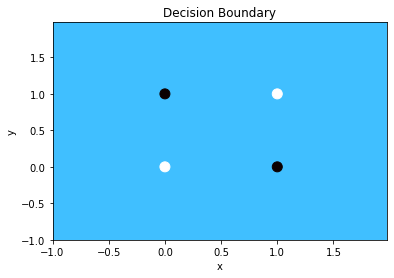

In [13]:
plot_decision_boundary(data,labels.reshape(-1,1),lr)

In [14]:
lr.predict(data)

array([0., 0., 0., 0.])

In [15]:
def fc2(x):
    return (x[0]-x[1],x[1]-x[0])

def fc1(x):
    return (-x[0]-x[1]) + 0.5

def relu(x):
    return max(x,0.)


def sigma(x):
    return 1/(1+np.exp(-x))

def network(x):
    
    x = fc2(x)
    x = [relu(x[0]),relu(x[1])]
    x = fc1(x)
    
    return 0.5*(np.sign(sigma(x) - 0.5) + 1.)

In [16]:
def plot_function_boundary(data,labels,f):
    plot_step = 0.02
    x_min, x_max = data[:,0].min() -1, data[:,0].max() + 1
    y_min,y_max = data[:,1].min() -1 , data[:,1].max() + 1

    xx,yy = np.meshgrid(np.arange(x_min,x_max,plot_step),
                   np.arange(y_min,y_max,plot_step))
    Z = np.array([f(z) for z in np.c_[xx.ravel(),yy.ravel()]])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx,yy,Z,cmap='cool')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Decision Boundary')

    plt.scatter(data[:,0],data[:,1],c=labels,cmap='hot',s=100)
    plt.show()

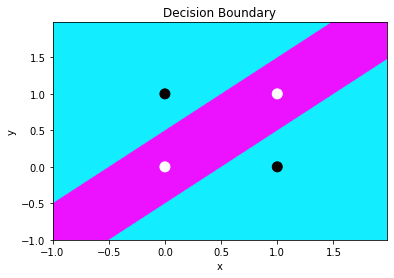

In [17]:
plot_function_boundary(data,labels,network)

In [18]:
train_set = TensorDataset(torch.FloatTensor(data),torch.FloatTensor(labels))

In [19]:
loader = DataLoader(train_set,batch_size=4)

In [20]:
t = next(iter(loader))

In [21]:
t

[tensor([[0., 0.],
         [1., 0.],
         [0., 1.],
         [1., 1.]]),
 tensor([1., 0., 0., 1.])]

In [22]:
class XOR(nn.Module):
    
    def __init__(self):

        super().__init__()
        self.fc2 = nn.Linear(2,2)
        self.fc1 = nn.Linear(2,1)
        self.relu = nn.ReLU()
        
    def forward(self,x):
        
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc1(x)
        
        return x
        
    def predict(self,x):
        return (1 + np.sign(self.forward(x).detach().numpy()))//2

In [23]:
xor = XOR()

In [24]:
torch.nn.init.kaiming_uniform_(xor.fc2.weight, a=0, mode='fan_in', nonlinearity='leaky_relu')

Parameter containing:
tensor([[-0.4135, -1.1825],
        [-0.8266, -1.5403]], requires_grad=True)

In [25]:
xor.fc2.weight = torch.nn.Parameter(torch.tensor([[ 1.5768, -0.6088],
                                [-0.1600,  0.6477]]))

In [26]:
loss_fun = nn.BCEWithLogitsLoss()

In [27]:
opt = Adam(xor.parameters(),lr=0.001)

In [28]:
epochs = 10000

losses = []



for e in range(epochs):
    
    for t in loader:
    
        opt.zero_grad()
    
        loss = loss_fun(xor(t[0]),t[1].reshape(-1,1))
        loss.backward()
        opt.step()
    
        losses.append(loss.item())
    
    

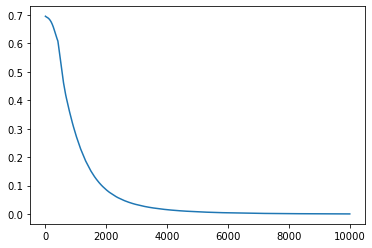

In [29]:
plt.plot(losses);

In [30]:
xor.fc1.weight

Parameter containing:
tensor([[-3.9380, -4.6298]], requires_grad=True)

In [31]:
xor.fc2.weight

Parameter containing:
tensor([[ 3.8748, -3.8749],
        [-3.3156,  3.3157]], requires_grad=True)

In [32]:
xor.fc1.bias

Parameter containing:
tensor([7.1152], requires_grad=True)

In [33]:
xor.fc2.bias

Parameter containing:
tensor([-1.1964e-04, -8.5394e-05], requires_grad=True)

In [34]:
xor(t[0])

tensor([[ 7.1152],
        [-8.1432],
        [-8.2357],
        [ 7.1151]], grad_fn=<AddmmBackward0>)

In [35]:
xor.predict(t[0])

array([[1.],
       [0.],
       [0.],
       [1.]], dtype=float32)

In [36]:
def plot_decision_boundary(data,labels,clf):
    plot_step = 0.02
    x_min, x_max = data[:,0].min() -1, data[:,0].max() + 1
    y_min,y_max = data[:,1].min() -1 , data[:,1].max() + 1

    xx,yy = np.meshgrid(np.arange(x_min,x_max,plot_step),
                   np.arange(y_min,y_max,plot_step))
    Z = np.array([clf.predict(torch.FloatTensor(z)) for z in np.c_[xx.ravel(),yy.ravel()]])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx,yy,Z,cmap='cool')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Decision Boundary')

    plt.scatter(data[:,0],data[:,1],c=labels,cmap='hot',s=100)
    plt.show()

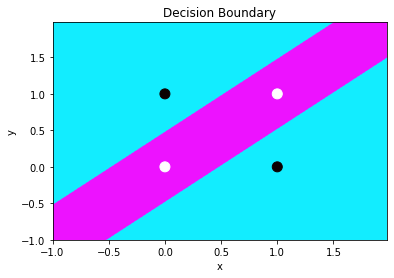

In [37]:
plot_decision_boundary(data,labels,xor)